<a href="https://colab.research.google.com/github/pkmariya/AIAgents/blob/main/langgraph_102.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import getpass

In [6]:
if "GROQ_API_KEY" not in os.environ:
  os.environ["GROQ_API_KEY"] = getpass.getpass("Enter your Groq API Key")

Enter your Groq API Key··········


In [7]:
!pip install langchain-groq --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.5/137.5 kB 3.0 MB/s eta 0:00:00


In [9]:
from langchain_groq import ChatGroq
from langchain_core.messages import HumanMessage, AIMessage

In [10]:
llm = ChatGroq(
    model_name="openai/gpt-oss-120b",
    temperature=0,
    max_tokens=None,
    max_retries=3,
    timeout=None
)

In [13]:
def Multiply(a: int, b: int) -> int:
  """ Multiply a and b.

  Args:
    a: first int
    b: second int

  Returns:
    a * b

  """
  return a * b

In [14]:
llm_with_tools = llm.bind_tools([Multiply])

In [15]:
tool_call = llm_with_tools.invoke([HumanMessage(content=f"What is 3 multiplied by 5", name="Mariya")])

In [16]:
tool_call

AIMessage(content='', additional_kwargs={'reasoning_content': 'User asks "What is 3 multiplied by 5". Simple multiplication. Could compute directly: 15. Could also use function Multiply. Let\'s use function.', 'tool_calls': [{'id': 'fc_6b3d02ae-73d2-41fd-8e8b-927d285199cb', 'function': {'arguments': '{"a":3,"b":5}', 'name': 'Multiply'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 67, 'prompt_tokens': 135, 'total_tokens': 202, 'completion_time': 0.143104649, 'completion_tokens_details': {'reasoning_tokens': 33}, 'prompt_time': 0.00646151, 'prompt_tokens_details': None, 'queue_time': 0.053889567, 'total_time': 0.149566159}, 'model_name': 'openai/gpt-oss-120b', 'system_fingerprint': 'fp_09a8f680f5', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--94b4560d-da43-4899-8b58-e42dbfae92de-0', tool_calls=[{'name': 'Multiply', 'args': {'a': 3, 'b': 5}, 'id': 'fc_6b3d02ae-73d2-41fd-8e8b-927d2851

In [18]:
tool_call.tool_calls

[{'name': 'Multiply',
  'args': {'a': 3, 'b': 5},
  'id': 'fc_6b3d02ae-73d2-41fd-8e8b-927d285199cb',
  'type': 'tool_call'}]

In [19]:
from langgraph.graph import MessagesState

In [20]:
class MessagesState(MessagesState):
  pass

In [21]:
from IPython.display import display, Image
from langgraph.graph import StateGraph, START, END

In [22]:
def tool_calling_llm(state: MessagesState):
  return {"messages": [llm_with_tools.invoke(state["messages"])]}

In [23]:
builder = StateGraph(MessagesState)

In [24]:
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_edge(START, "tool_calling_llm")
builder.add_edge("tool_calling_llm", END)

In [25]:
graph = builder.compile()

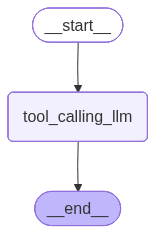

In [26]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [31]:
messages = graph.invoke({"messages": [HumanMessage(content="Hello", name="Mariya")]})
for m in messages['messages']:
  m.pretty_print()


================================ Human Message =================================
Name: Mariya

Hello
================================== Ai Message ==================================

Hello! How can I assist you today?


In [32]:
messages = graph.invoke({"messages": [HumanMessage(content="Multiply 10 by 15", name="Mariya")]})
for m in messages['messages']:
  m.pretty_print()

================================ Human Message =================================
Name: Mariya

Multiply 10 by 15
================================== Ai Message ==================================
Tool Calls:
  Multiply (fc_dc2f68fb-513e-414a-b77e-879118c7ca1b)
 Call ID: fc_dc2f68fb-513e-414a-b77e-879118c7ca1b
  Args:
    a: 10
    b: 15
